# 1、导包

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 在python console里面生成图像
%matplotlib inline 
import numpy as np
import sklearn
import pandas as pd 
import tensorflow as tf
from tensorflow import keras


E:\software\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
E:\software\Anaconda\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
E:\software\Anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# 2、加载数据并处理

In [6]:
fasion_mnist = keras.datasets.fashion_mnist

#print(fasion_mnist)

(x_train,y_train),(x_test,y_test)= fasion_mnist.load_data()

x_valid,x_train=x_train[:5000],x_train[5000:]
y_valid,y_train=y_train[:5000],y_train[5000:]


# 打印数据格式
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


# 2.1 数据标准化处理

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,28*28)).reshape(-1,28,28)

x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,28*28)).reshape(-1, 28, 28)

x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,28*28)).reshape(-1, 28, 28)

# 3、构建模型

In [5]:
#tf.keras.models.Sequential()构建模型
"""
在官网中对Sequential的介绍为"layers:list of layers to add to model."即将一系列的层次堆叠起来。
"""
 
model = keras.models.Sequential()  #创建一个Sequential的对象
 
    
"""
往这个Sequential对象里面添加层，首先添加的是输入层，这一层的作用：使用Flatten将输入的对象（1张28*28的图像）展平，
即将1个28*28的二维矩阵展平成为1个一维向量。
"""
model.add(keras.layers.Flatten(input_shape=[28,28]))  #添加输入层，展开输入的图片

 
    
"""
展平之后，再加入新的一层，这一层为全连接层（最普通的神经网络），
并把上一层的所有单元都与下一层的所有单元进行一一连接。把这一层的单元数设为300，activation即为激活函数，设为"relu"。
"""
model.add(keras.layers.Dense(300, activation="relu"))  #添加全连接层，单元数为300

#这一层的100个单元就会和上一层300个单元进行全连接
model.add(keras.layers.Dense(100, activation="relu"))  #添加全连接层，单元数为100

 
    
"""再添加一层，控制其的输出。上述的问题是一个分类问题，模型输出应为长度为10的一个概率分布，
这里应使其的输出为一个长度为10的向量。
"""
model.add(keras.layers.Dense(10,activation="softmax"))  #添加输出层，输出概率分布

 
 
 
"""
#Sequential函数的另一种写法，不用逐层调用add函数，可以将每层都放置在一个列表中：
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                                keras.layers.Dense(300, activation="relu"),
                                keras.layers.Dense(100, activation="relu"),
                                keras.layers.Dense(10, activation="softmax")])
效果与上相同。
"""
 
#有了概率分布之后，就可以计算目标函数
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"]) 
"""
这个函数的参数分别为：
    损失函数 loss，
    "crossentropy"即为上述“交叉熵”的损失函数。加上前缀sparse的原因为：y → index。
    放置损失函数的前提是：y → one_hot → []（向量）。因为这里的y长度等于样本数量，所以对于每个样本而言，y都是1个数值。若y为1个数值，则使用"sparse_categorical_crossentropy"；若y为1个向量，就无需使用"sparse"，直接使用"categorical_crossentropy"即可。
    
    optimizer为目标函数的求解方法，调整参数，使目标函数越来越小，这里就是目标函数参数的调整方法。
    除目标函数的指标之外，还应注意其他指标，如"accuracy"。
    目的是将目标函数指标和其他我们关心的指标构建到图中。
"""


'\n这个函数的参数分别为：\n    损失函数 loss，\n    "crossentropy"即为上述“交叉熵”的损失函数。加上前缀sparse的原因为：y → index。\n    放置损失函数的前提是：y → one_hot → []（向量）。因为这里的y长度等于样本数量，所以对于每个样本而言，y都是1个数值。若y为1个数值，则使用"sparse_categorical_crossentropy"；若y为1个向量，就无需使用"sparse"，直接使用"categorical_crossentropy"即可。\n    \n    optimizer为目标函数的求解方法，调整参数，使目标函数越来越小，这里就是目标函数参数的调整方法。\n    除目标函数的指标之外，还应注意其他指标，如"accuracy"。\n    目的是将目标函数指标和其他我们关心的指标构建到图中。\n'

# 使用回调函数

In [7]:
import os
#使用回调函数
#tensorBoard、EarlyStopping、ModelCheckPoint
logdir = os.path.join("callbacks")

if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_mnist_model.h5")


callbacks=[
     keras.callbacks.TensorBoard(log_dir=logdir), #log_dir将输出的日志保存在所要保存的路径中
     keras.callbacks.ModelCheckpoint(output_model_file, save_best_only = True), 
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
    
]

# 4、训练模型

In [8]:


#构建好图以后，可以开启训练
history = model.fit(x_train_scaled, y_train, epochs=10,
          #epochs表示命令这个训练集多少次，epochs=10表示命令这个训练集10次
         validation_data=(x_valid_scaled,y_valid),
          #每隔段时间，会对这个训练集做验证 
                    
            callbacks=callbacks     
         )

#history表示model.fit返回的一个值，称为 数据结果

Epoch 1/10
1719/1719 [==============================] - 13s 6ms/step - loss: 0.5436 - accuracy: 0.8054 - val_loss: 0.3395 - val_accuracy: 0.8720
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3326 - accuracy: 0.8784 - val_loss: 0.3714 - val_accuracy: 0.8642
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2930 - accuracy: 0.8906 - val_loss: 0.3555 - val_accuracy: 0.8756
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2653 - accuracy: 0.9006 - val_loss: 0.3252 - val_accuracy: 0.8834
Epoch 5/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2374 - accuracy: 0.9105 - val_loss: 0.3209 - val_accuracy: 0.8874
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2271 - accuracy: 0.9155 - val_loss: 0.3146 - val_accuracy: 0.8878
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2095 - accuracy: 0.9197 - val_loss: 0.3507 - val_accuracy

# 5、 可视化（打印出指标的变化过程）

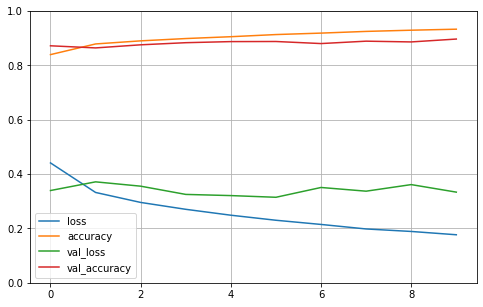

In [9]:
def plot_learning_curves(history):
    
    """
    #DataFrame是一个重要的数据结构（k值做列名，v值做值）， 
    figsize=(8,5)表示把图的大小设置为8和5 
    """
    pd.DataFrame(history.history).plot(figsize=(8, 5))  
    
    plt.grid(True)  #显示网格
    plt.gca().set_ylim(0,1)  #设置坐标轴的范围，set_ylim(0,1)设置y轴坐标轴的范围
    plt.show()  #显示这张图
    
plot_learning_curves(history)

# 6、测试

In [10]:
model.evaluate(x_test_scaled,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3809 - accuracy: 0.8889


[0.3808513879776001, 0.8888999819755554]